<a href="https://colab.research.google.com/github/louiselaier/Labourymarketaqmexam/blob/main/Labour_Market_AQM_exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Processing the data**

In [ ]:
# Loading packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import scipy as sp
%matplotlib inline

In [ ]:
# Preprocessing Libraries
import sklearn.preprocessing as preprocessing
# Regression Libraries
import statsmodels.api as sm
# Setting the plot style with seaborn
sns.set()

In [ ]:
#Loading the dataset
df = pd.read_csv('https://raw.githubusercontent.com/louiselaier/labourmarketaqm/main/labour_market%20exam%20aqm.csv', sep=';')


# **Data description and checks**

In [ ]:
# Checking the dataset

# df.tail()
df.tail()

,Minority,Gender,callback,Industry,Employees,Organization_type
395,1,1,0,Education,30.0,0
396,1,1,0,Retail,5.0,0
397,1,1,0,Retail,25.0,1
398,0,1,0,Retail,7.0,1
399,0,1,0,Health care,5.0,1


In [ ]:
# Checking that none of the variables have missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Minority           400 non-null    int64  
 1   Gender             400 non-null    int64  
 2   callback           400 non-null    int64  
 3   Industry           400 non-null    object 
 4   Employees          398 non-null    float64
 5   Organization_type  400 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 18.9+ KB


In [ ]:
df.shape

(400, 6)

In [ ]:
df.columns

Index(['Minority', 'Gender', 'callback', 'Industry', 'Employees',
       'Organization_type'],
      dtype='object')

In [ ]:
drop_list = ['Minority', 'Gender', 'callback', 'Industry', 'Employees', 'Organization_type']
df = df.drop(df.columns.difference(drop_list), axis=1)
df

,Minority,Gender,callback,Industry,Employees,Organization_type
0,0,0,0,Retail,20.0,1
1,0,0,0,Health care,25.0,0
2,0,1,0,Health care,60.0,0
3,0,1,0,Retail,7.0,1
4,1,1,0,Retail,10.0,1
...,...,...,...,...,...,...
395,1,1,0,Education,30.0,0
396,1,1,0,Retail,5.0,0
397,1,1,0,Retail,25.0,1
398,0,1,0,Retail,7.0,1


In [ ]:
# We are creating dummies, so we instead of just having "Industry" we have each of the industries "Industry_Administrative support" etc.
df_1=pd.get_dummies(df)
df_1

,Minority,Gender,callback,Employees,Organization_type,Industry_Administrative support,Industry_Construction & Extraction,Industry_Education,Industry_Health care,Industry_Retail,Industry_Sales & related
0,0,0,0,20.0,1,0,0,0,0,1,0
1,0,0,0,25.0,0,0,0,0,1,0,0
2,0,1,0,60.0,0,0,0,0,1,0,0
3,0,1,0,7.0,1,0,0,0,0,1,0
4,1,1,0,10.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
395,1,1,0,30.0,0,0,0,1,0,0,0
396,1,1,0,5.0,0,0,0,0,0,1,0
397,1,1,0,25.0,1,0,0,0,0,1,0
398,0,1,0,7.0,1,0,0,0,0,1,0


In [ ]:
# Here we are dropping the first dummies because we want to use them in our regression model
df_2=df_1.drop(['Minority','Gender'], axis=1)
df_2

,callback,Employees,Organization_type,Industry_Administrative support,Industry_Construction & Extraction,Industry_Education,Industry_Health care,Industry_Retail,Industry_Sales & related
0,0,20.0,1,0,0,0,0,1,0
1,0,25.0,0,0,0,0,1,0,0
2,0,60.0,0,0,0,0,1,0,0
3,0,7.0,1,0,0,0,0,1,0
4,0,10.0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...
395,0,30.0,0,0,0,1,0,0,0
396,0,5.0,0,0,0,0,0,1,0
397,0,25.0,1,0,0,0,0,1,0
398,0,7.0,1,0,0,0,0,1,0


In [ ]:
# Making a description of the different variables
df_2.describe()

,callback,Employees,Organization_type,Industry_Administrative support,Industry_Construction & Extraction,Industry_Education,Industry_Health care,Industry_Retail,Industry_Sales & related
count,400.00000,398.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.26750,47.670854,0.695000,0.165000,0.202500,0.137500,0.150000,0.245000,0.100000
std,0.44321,28.326714,0.460984,0.371645,0.402366,0.344806,0.357519,0.430626,0.300376
min,0.00000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.00000,51.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.00000,62.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.00000,205.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Here is a value count of how many minorities and non-minority people there are represented in the dataset (1 = minority, 0 = otherwise)
df_1.Minority.value_counts()

0    202
1    198
Name: Minority, dtype: int64

In [ ]:
df_1.groupby(["callback", "Minority"]).size()

callback  Minority
0         0           137
          1           156
1         0            65
          1            42
dtype: int64

# **Visualization of data**

<Axes: xlabel='callback', ylabel='Density'>

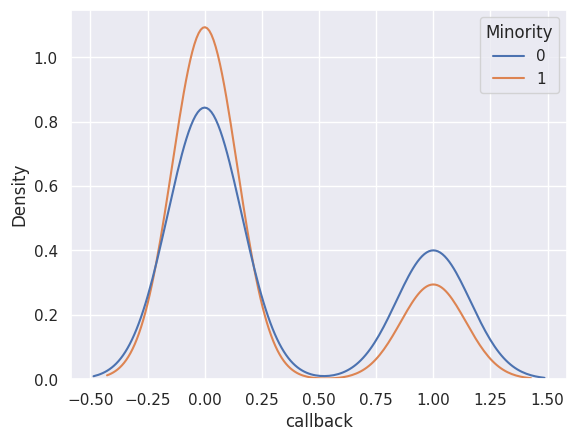

In [ ]:
sns.kdeplot(data=df, x='callback', hue='Minority')

<Axes: xlabel='Gender', ylabel='Density'>

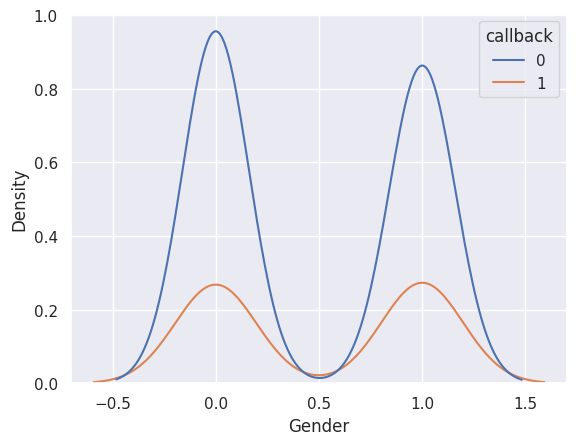

In [ ]:
sns.kdeplot(data=df, x='Gender', hue='callback')

<Axes: xlabel='Organization_type', ylabel='Density'>

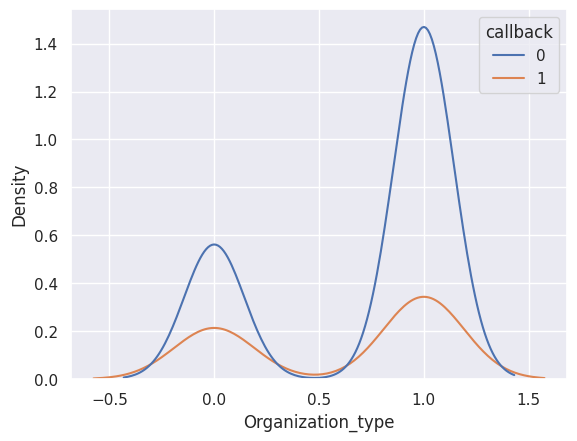

In [ ]:
sns.kdeplot(data=df, x='Organization_type', hue='callback')

# **Anova Test**

((array([-2.92336218, -2.63535913, -2.47295045, -2.35755533, -2.26698478,
         -2.19190181, -2.1274581 , -2.0708001 , -2.0201009 , -1.97411768,
         -1.93196517, -1.89298964, -1.85669409, -1.82269149, -1.79067433,
         -1.76039407, -1.73164687, -1.70426336, -1.67810123, -1.65303972,
         -1.62897542, -1.6058191 , -1.58349316, -1.56192972, -1.54106902,
         -1.52085818, -1.50125015, -1.48220291, -1.46367871, -1.44564358,
         -1.42806678, -1.41092042, -1.39417912, -1.37781969, -1.36182093,
         -1.34616333, -1.33082898, -1.31580134, -1.3010651 , -1.28660611,
         -1.2724112 , -1.25846816, -1.24476556, -1.23129278, -1.21803987,
         -1.20499751, -1.19215696, -1.17951003, -1.16704898, -1.15476657,
         -1.14265594, -1.13071061, -1.11892449, -1.10729178, -1.09580701,
         -1.08446499, -1.07326079, -1.06218972, -1.05124734, -1.0404294 ,
         -1.02973187, -1.01915091, -1.00868282, -0.99832412, -0.98807145,
         -0.97792161, -0.96787152, -0.

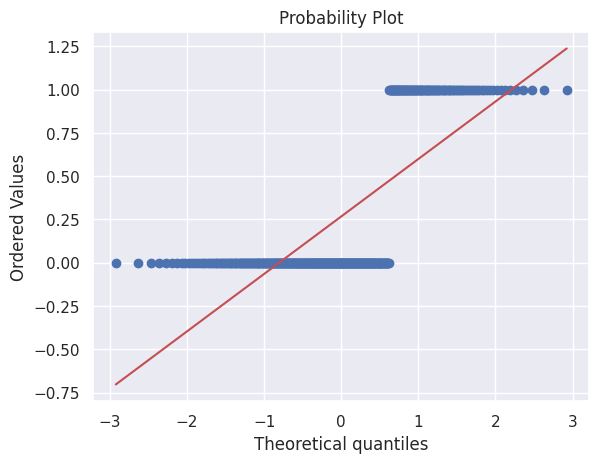

In [ ]:
# # Checking for normality using a QQ-Plot.
sp.stats.probplot(x=df_2['callback'], dist='norm', plot=plt)

In [ ]:
f_value, p_value = sp.stats.f_oneway(df_1['callback'][df_1['Minority'] == 0],
df_1['callback'][df_1['Minority'] == 1])

In [ ]:
print(f"The F-value of the one-way ANOVA on Minority groups is: {f_value}")

The F-value of the one-way ANOVA on Minority groups is: 6.201071768046977


In [ ]:
# Finding degree of freedom from the numerator and denominator
df_numerator = 2 -1
df_denominator = df_1[df_1['Minority'].isin([0, 1])].shape[0] - 2
print(f"The degrees of freedom in the numerator is: {df_numerator}")
print(f"The degrees of freedom in the denominator is: {df_denominator}")

The degrees of freedom in the numerator is: 1
The degrees of freedom in the denominator is: 398


In [ ]:
# Identifying the critical value
alpha = 0.05
critical_value = sp.stats.f.ppf(q=(1-alpha), dfn=df_numerator, dfd=df_denominator)
print(f"The critical value at a significance level of 0.05 for our F distribution is: {critical_value}")

The critical value at a significance level of 0.05 for our F distribution is: 3.8649292212017365


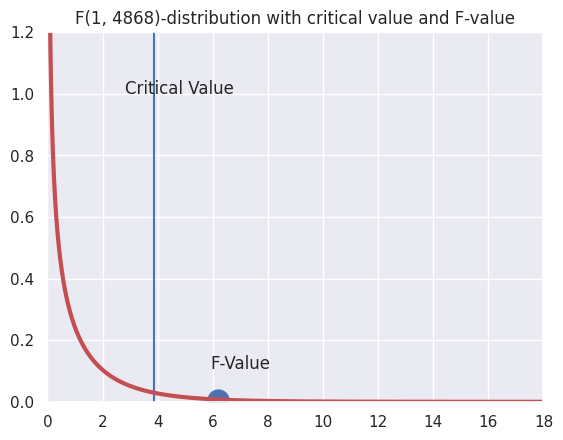

In [ ]:
fig, ax = plt.subplots(1,1) # Setting up the plotting.
x = np.arange(0, 18, 0.001) # Defining a range of x_values.
plt.title('F(1, 4868)-distribution with critical value and F-value')
plt.xlim(0, 18) # Defining the X-axis limit.
plt.ylim(0,1.2) # Defining the Y-axis limit.
plt.axvline(critical_value) # Plotting the critical value.
plt.plot(f_value, sp.stats.f.pdf(x=f_value, dfn=df_numerator, dfd=df_denominator), marker='o', markersize=15) # Plotting the F-dist.
ax.plot(x, sp.stats.f.pdf(x, df_numerator, df_denominator), 'r-', lw=3) # Plotting our f_value.
plt.annotate("F-Value", (f_value - 0.3, sp.stats.f.pdf(x=f_value, dfn=df_numerator, dfd=df_denominator)+0.1))
plt.annotate("Critical Value", (2.8, 1))
plt.show()

Text(2.8, 1, 'Critical Value')

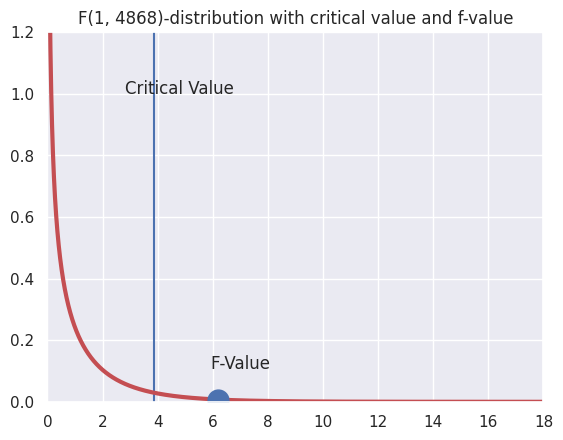

In [ ]:
# Values for F-distribution plot.
x = np.arange(0, 18, 0.001) # Creating a list of 5000 x-values for our plot.
y = sp.stats.f.pdf(x, df_numerator, df_denominator) # Mapping the 5000 x-values to the F-distribution pdf.
# y-value for our F-test F-value.
f_value_y = sp.stats.f.pdf(x=f_value, dfn=df_numerator, dfd=df_denominator)
# Setting up our plot:
fig, ax = plt.subplots(1, 1)
# Defining some settings for our plot:
plt.title('F(1, 4868)-distribution with critical value and f-value')
plt.xlim(0, 18)
plt.ylim(0, 1.2)
# Plotting the horizontal line for the critical value:
plt.axvline(critical_value)
# Plotting the F(1, 4868)-distribution.
ax.plot(x, y, 'r-', lw=3)
# Plotting the F-value:
plt.plot(f_value, f_value_y, marker = 'o', markersize=15)
# Annotating the critical value line and the f-value dot:
plt.annotate("F-Value", (f_value - 0.3, f_value_y + 0.1))
plt.annotate("Critical Value", (2.8, 1))

In [ ]:
# Printing the p-value
print(f"The p-value of the one-way ANOVA on Minority is: {p_value}")

The p-value of the one-way ANOVA on race groups is: 0.013174361798664205


In [ ]:
# Computing the variance of call in Minority
var_b = df_1[df_1['Minority'] == 0].callback.var()
var_w = df_1[df_1['Minority'] == 1].callback.var()

In [ ]:
print(f"The variance of call of people being a minority: {var_b}")
print(f"The variance of call of people being a minority: {var_w}")

The variance of call of people being a minority: 0.2193241712230924
The variance of call of people being a minority: 0.1679741578218736


# **Chi-Square Test**

In [ ]:
contingency = pd.crosstab(df_1['callback'], df_1['Minority'])
contingency

Minority,0,1
callback,,
0,137,156
1,65,42


In [ ]:
# A crosstab in percentage
contingency_pct = pd.crosstab(df_1['callback'], df_1['Minority'],normalize='index')
contingency_pct

Minority,0,1
callback,,
0,0.467577,0.532423
1,0.607477,0.392523


In [ ]:
from scipy.stats import chi2_contingency

In [ ]:
c, p, dof, expected = chi2_contingency(contingency)
pd.DataFrame(expected)

,0,1
0,147.965,145.035
1,54.035,52.965


In [ ]:
contingency.sum()/50

Minority
0    4.04
1    3.96
dtype: float64

In [ ]:
print(p)

0.018066127029584773


# **OLS Regression Model: Minority and Callback**

In [ ]:
X = df_1['Minority']
X = sm.add_constant(X)

In [ ]:
model = sm.OLS(df_1['callback'], X)

In [ ]:
df_1_results = model.fit()

In [ ]:
print(df_1_results.summary())

                            OLS Regression Results                            
Dep. Variable:               callback   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.013
Method:                 Least Squares   F-statistic:                     6.201
Date:                Mon, 09 Oct 2023   Prob (F-statistic):             0.0132
Time:                        14:53:28   Log-Likelihood:                -238.50
No. Observations:                 400   AIC:                             481.0
Df Residuals:                     398   BIC:                             489.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3218      0.031     10.386      0.0

In [ ]:
!pip install stargazer -q

In [ ]:
from stargazer.stargazer import Stargazer

In [ ]:
model_overview = Stargazer([df_1_results])
model_overview

# **OLS Regression Model: Gender and Callback**

In [ ]:
X_1 = df_1['Gender']
X_1 = sm.add_constant(X_1)

In [ ]:
model_1 = sm.OLS(df_1['callback'], X_1)

In [ ]:
df_1_results_1 = model_1.fit()

In [ ]:
print(df_1_results_1.summary())

                            OLS Regression Results                            
Dep. Variable:               callback   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.002
Method:                 Least Squares   F-statistic:                    0.2864
Date:                Mon, 09 Oct 2023   Prob (F-statistic):              0.593
Time:                        15:08:56   Log-Likelihood:                -241.45
No. Observations:                 400   AIC:                             486.9
Df Residuals:                     398   BIC:                             494.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.2560      0.031      8.304      0.0

In [ ]:
model_overview_1 = Stargazer([df_1_results_1])
model_overview_1

# **OLS Regression Model: Organization type and Callback**

In [ ]:
X_2 = df_2['Organization_type']
X_2 = sm.add_constant(X_2)

In [ ]:
model_2 = sm.OLS(df_1['callback'], X_2)

In [ ]:
df_1_results_2 = model_2.fit()

In [ ]:
print(df_1_results_2.summary())

                            OLS Regression Results                            
Dep. Variable:               callback   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     4.235
Date:                Mon, 09 Oct 2023   Prob (F-statistic):             0.0402
Time:                        15:03:13   Log-Likelihood:                -239.47
No. Observations:                 400   AIC:                             482.9
Df Residuals:                     398   BIC:                             490.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.3361      0.04

In [ ]:
model_overview_3 = Stargazer([df_1_results_2])
model_overview_3

In [ ]:
model_overview_2 = Stargazer([df_1_results, df_1_results_1,df_1_results_2])
model_overview_2

In [ ]:
corr_mat = df_1.corr()
corr_mat

,Minority,Gender,callback,Employees,Organization_type,Industry_Administrative support,Industry_Construction & Extraction,Industry_Education,Industry_Health care,Industry_Retail,Industry_Sales & related
Minority,1.000000,-0.075400,-0.123861,0.048344,0.036817,0.044859,0.073474,0.011253,-0.065816,-0.029182,-0.046669
Gender,-0.075400,1.000000,0.026815,-0.040377,-0.044933,0.029047,-0.050826,0.050303,-0.013311,-0.014948,0.011674
callback,-0.123861,0.026815,1.000000,0.058845,-0.102612,-0.131691,-0.051543,0.004715,0.141561,-0.042218,0.118602
Employees,0.048344,-0.040377,0.058845,1.000000,0.093009,0.072286,0.218967,-0.182948,0.013093,-0.185364,0.077321
Organization_type,0.036817,-0.044933,-0.102612,0.093009,1.000000,0.148191,0.306790,-0.508112,-0.527682,0.288993,0.202719
Industry_Administrative support,0.044859,0.029047,-0.131691,0.072286,0.148191,1.000000,-0.223999,-0.177489,-0.186739,-0.253226,-0.148176
Industry_Construction & Extraction,0.073474,-0.050826,-0.051543,0.218967,0.306790,-0.223999,1.000000,-0.201196,-0.211682,-0.287049,-0.167968
Industry_Education,0.011253,0.050303,0.004715,-0.182948,-0.508112,-0.177489,-0.201196,1.000000,-0.167729,-0.227448,-0.133092
Industry_Health care,-0.065816,-0.013311,0.141561,0.013093,-0.527682,-0.186739,-0.211682,-0.167729,1.000000,-0.239302,-0.140028
Industry_Retail,-0.029182,-0.014948,-0.042218,-0.185364,0.288993,-0.253226,-0.287049,-0.227448,-0.239302,1.000000,-0.189884


<Axes: >

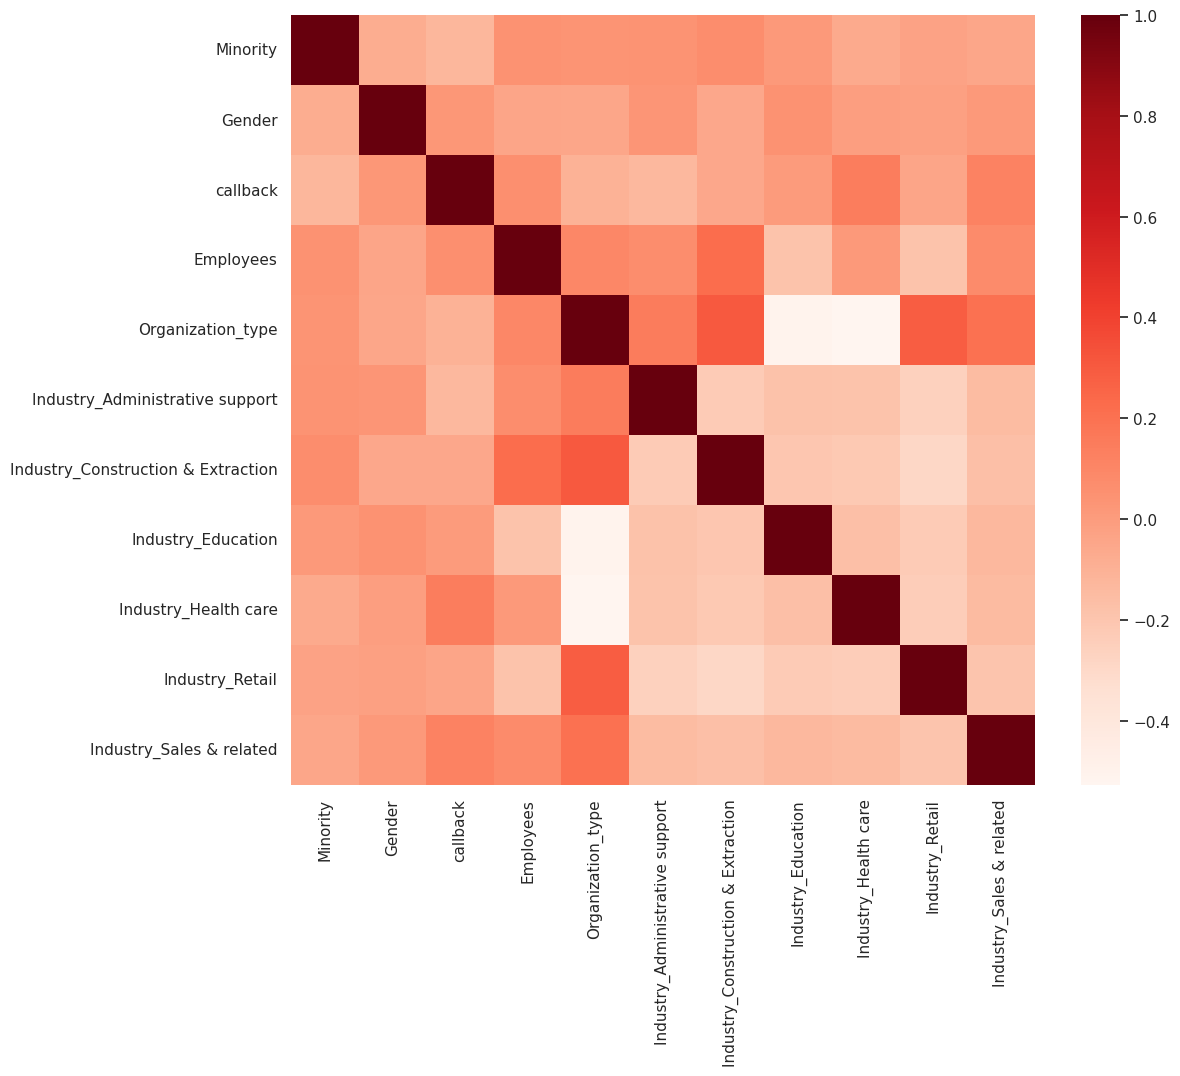

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(corr_mat, cmap='Reds')